In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit  # import the curve fitting function
%matplotlib inline

# Constants 

In [2]:
n = 1.33 #DI
n2 = 1.375 #Solution
y = 633*1e-9 #wavelength


theta = np.pi/2

K = (4*np.pi*n/y)*np.sin(theta/2)

kb = 1.38064852*1e-23
T = 20 + 273
eta = 1.005*1e-3 #DI
eta2 = 1.76*1e-3 #Solution



K2 = (4*np.pi*n2/y)*np.sin(theta/2)

In [3]:
def getradius(D,eta):
    return (kb*T)/(6*np.pi*eta*D)

def getradiusuncertainty(D,eta,eD):
    return eD*(kb*T)/(6*np.pi*eta*D**2)

In [4]:
#This will use label A
DI_110nm = np.loadtxt('110nm_DI.txt',delimiter = ',');
DI_110nm_2 = np.loadtxt('110nm_DI_2.txt',delimiter = ',');

#Label B
DI_153um = np.loadtxt('153um_DI.txt',delimiter = ',');

#Label C
Glycerol20_DI80_110nm = np.loadtxt('110nm_80DI_20Glycerol.txt',delimiter = ',');
Glycerol20_DI80_110nm_2 = np.loadtxt('110nm_80DI_20Glycerol_2.txt',delimiter = ',');

#Label D
DI_110nm_153um = np.loadtxt('110nm_153um_DI.txt',delimiter = ',');

# DI water with 0.11$\mu$m beads

In [5]:
ACorr = np.array([DI_110nm[i][0] for i in np.arange(0,len(DI_110nm))])
ATime = np.array([DI_110nm[i][1] for i in np.arange(0,len(DI_110nm))])

ACorr2 = np.array([DI_110nm_2[i][0] for i in np.arange(0,len(DI_110nm_2))])
ATime2 = np.array([DI_110nm_2[i][1] for i in np.arange(0,len(DI_110nm_2))])

C:\Users\James\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


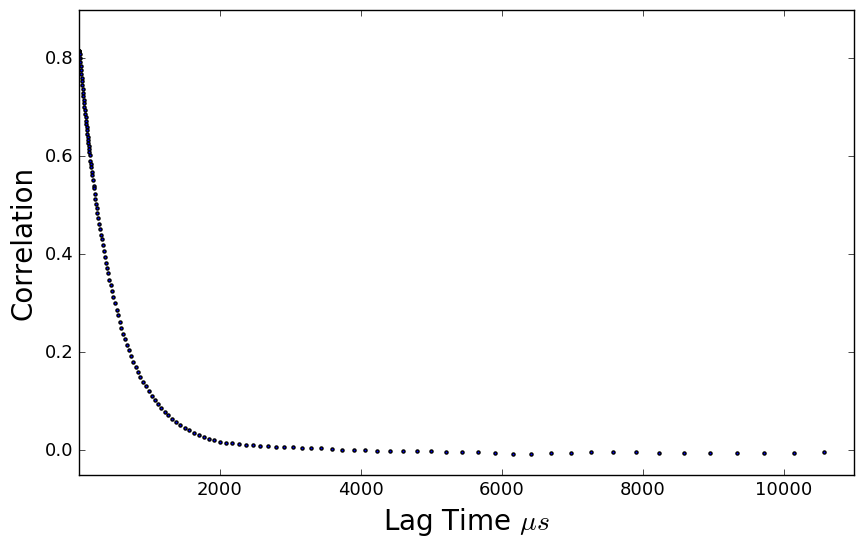

In [6]:
plt.figure(figsize=(10,6));


plt.scatter(ATime2,ACorr2,marker='.');

plt.xlabel('Lag Time $\mu s$',fontsize=20);
plt.ylabel('Correlation',fontsize = 20);

plt.xticks(size = 13);
plt.yticks(size = 13);

plt.legend(loc='best');
plt.xlim(1,11000);
plt.ylim(-0.05,0.9);

plt.savefig('Data.png')

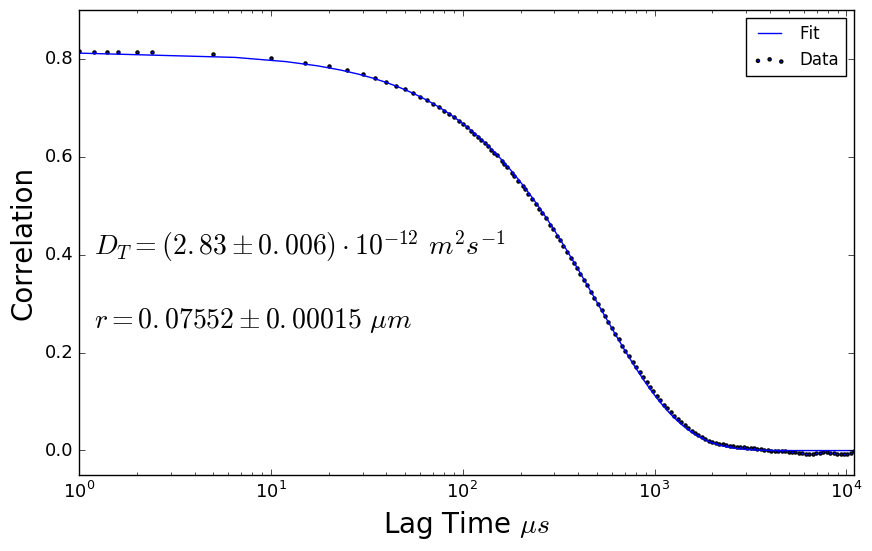

In [7]:
def myfun(tau,beta,D,c):
    ans =  beta*np.exp(-2*D*(K**2)*tau) + c
    return ans

p0 = [0.5,1e-18,0.2] #guess

xspace = np.linspace(1,11000,2000) 

plsq, pcov = curve_fit(myfun, ATime2, ACorr2, p0)  # curve fit returns p and covariance matrix
# these give the parameters and the uncertainties
beta = plsq[0]
ebeta = np.sqrt(pcov[0,0])

D = plsq[1]*1e6
eD = np.sqrt(pcov[1,1])*1e6



c = plsq[2]
ec = np.sqrt(pcov[2,2])

yfit = myfun(xspace,plsq[0],plsq[1],plsq[2])  # use fit results for a, b, c

plt.figure(figsize=(10,6));


plt.scatter(ATime2,ACorr2,marker='.',label='Data');
plt.plot(xspace,yfit,label='Fit');

plt.xlabel('Lag Time $\mu s$',fontsize=20);
plt.ylabel('Correlation',fontsize = 20);

plt.xticks(size = 13);
plt.yticks(size = 13);

plt.legend(loc='best');
plt.xscale('log');
plt.xlim(1,11000);
plt.ylim(-0.05,0.9);


plt.text(1.2,0.4,'$D_T = (%.2f \pm %.3f) \cdot  10^{-12}$ ${m^2}{s^{-1}}$' % (D*1e12, eD*1e12),size=20);

r = getradius(D,eta)
er = getradiusuncertainty(D,eta,eD)
plt.text(1.2,0.25,'$r = %.5f \pm %.5f $ $\mu m$' % (r*1e6, er*1e6),size=20);

plt.savefig('AFit.png')

# DI water with 153$\mu$m  beads

In [8]:
BCorr = np.array([DI_153um[i][0] for i in np.arange(0,len(DI_153um))])
BTime = np.array([DI_153um[i][1] for i in np.arange(0,len(DI_153um))])

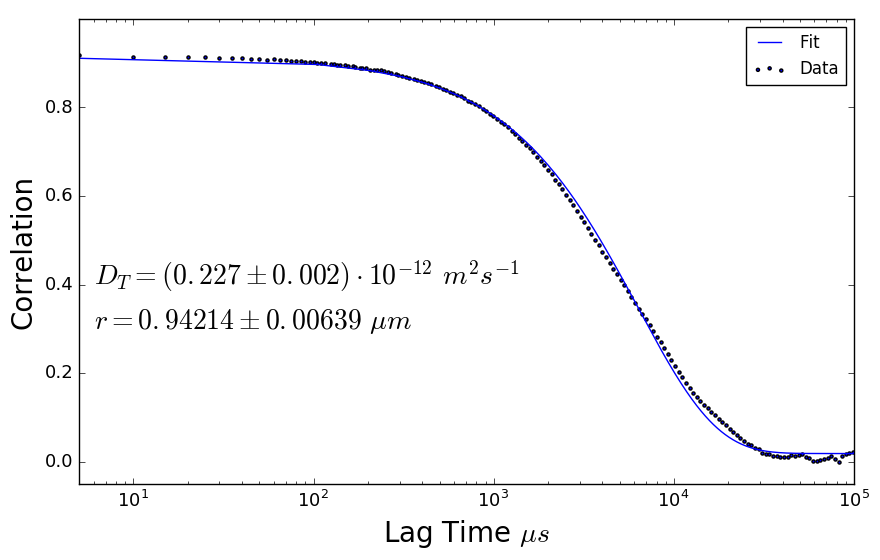

In [9]:
def myfun2(tau,beta,D,c):
    ans =  beta*np.exp(-2*D*(K**2)*tau) + c
    return ans

p02 = [0.5,1e-18,0.2] #guess

xspace2 = np.linspace(5,100000,1000) 

plsq2, pcov2 = curve_fit(myfun2, BTime, BCorr, p02)  # curve fit returns p and covariance matrix
# these give the parameters and the uncertainties
beta2 = plsq2[0]
ebeta2 = np.sqrt(pcov2[0,0])

D2 = plsq2[1]*1e6
eD2 = np.sqrt(pcov2[1,1])*1e6

c2 = plsq2[2]
ec2 = np.sqrt(pcov2[2,2])

yfit2 = myfun2(xspace2,plsq2[0],plsq2[1],plsq2[2])  # use fit results for a, b, c

plt.figure(figsize=(10,6));


plt.scatter(BTime,BCorr,marker='.',label='Data');
plt.plot(xspace2,yfit2,label='Fit');

plt.xlabel('Lag Time $\mu s$',fontsize=20);
plt.ylabel('Correlation',fontsize = 20);

plt.xticks(size = 13);
plt.yticks(size = 13);

plt.legend(loc='best');
plt.xscale('log');
plt.xlim(5,100000);

plt.ylim(-0.05,1);


plt.text(6,0.4,'$D_T = (%.3f \pm %.3f) \cdot  10^{-12}$ ${m^2}{s^{-1}}$' % (D2*1e12, eD2*1e12),size=20);

r2 = getradius(D2,eta)
er2 = getradiusuncertainty(D2,eta,eD2)
plt.text(6,0.3,'$r = %.5f \pm %.5f $ $\mu m$' % (r2*1e6, er2*1e6),size=20);




plt.savefig('BFit.png')

# 20$\%$ glycerol by wt., 80$\%$ DI water, with 0.11$\mu$m beads

In [10]:
CCorr = np.array([Glycerol20_DI80_110nm[i][0] for i in np.arange(0,len(Glycerol20_DI80_110nm))])
CTime = np.array([Glycerol20_DI80_110nm[i][1] for i in np.arange(0,len(Glycerol20_DI80_110nm))])

CCorr2 = np.array([Glycerol20_DI80_110nm_2[i][0] for i in np.arange(0,len(Glycerol20_DI80_110nm_2))])
CTime2 = np.array([Glycerol20_DI80_110nm_2[i][1] for i in np.arange(0,len(Glycerol20_DI80_110nm_2))])

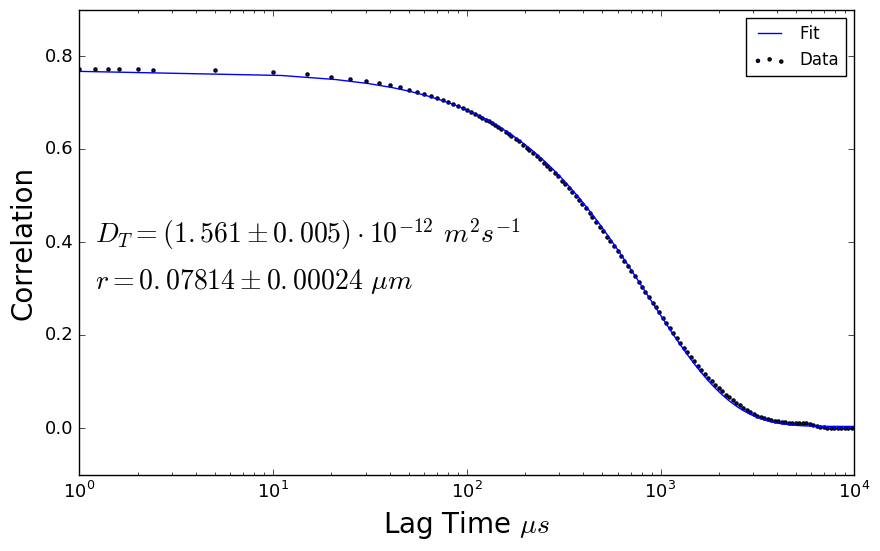

In [11]:
def myfun3(tau,beta,D,c):
    ans =  beta*np.exp(-2*D*(K2**2)*tau) + c
    return ans

p03 = [0.5,1e-18,0.2] #guess

xspace3 = np.linspace(1,10000,1000) 

plsq3, pcov3 = curve_fit(myfun3, CTime, CCorr, p03)  # curve fit returns p and covariance matrix
# these give the parameters and the uncertainties
beta3 = plsq3[0]
ebeta3 = np.sqrt(pcov3[0,0])

D3 = plsq3[1]*1e6
eD3 = np.sqrt(pcov3[1,1])*1e6

c3 = plsq3[2]
ec3 = np.sqrt(pcov3[2,2])

yfit3 = myfun3(xspace3,plsq3[0],plsq3[1],plsq3[2])  # use fit results for a, b, c

plt.figure(figsize=(10,6));


plt.scatter(CTime,CCorr,marker='.',label='Data');
plt.plot(xspace3,yfit3,label='Fit');

plt.xlabel('Lag Time $\mu s$',fontsize=20);
plt.ylabel('Correlation',fontsize = 20);

plt.xticks(size = 13);
plt.yticks(size = 13);

plt.legend(loc='best');
plt.xscale('log');
plt.xlim(0,10000);


plt.text(1.2,0.4,'$D_T = (%.3f \pm %.3f) \cdot  10^{-12}$ ${m^2}{s^{-1}}$' % (D3*1e12, eD3*1e12),size=20);

r3 = getradius(D3,eta2)
er3 = getradiusuncertainty(D3,eta2,eD3)
plt.text(1.2,0.3,'$r = %.5f \pm %.5f $ $\mu m$' % (r3*1e6, er3*1e6),size=20);




plt.savefig('CFit.png')

# DI water with 0.11$\mu$m and 153$\mu$m  beads

In [12]:
DCorr = np.array([DI_110nm_153um[i][0] for i in np.arange(0,len(DI_110nm_153um))])
DTime = np.array([DI_110nm_153um[i][1] for i in np.arange(0,len(DI_110nm_153um))])

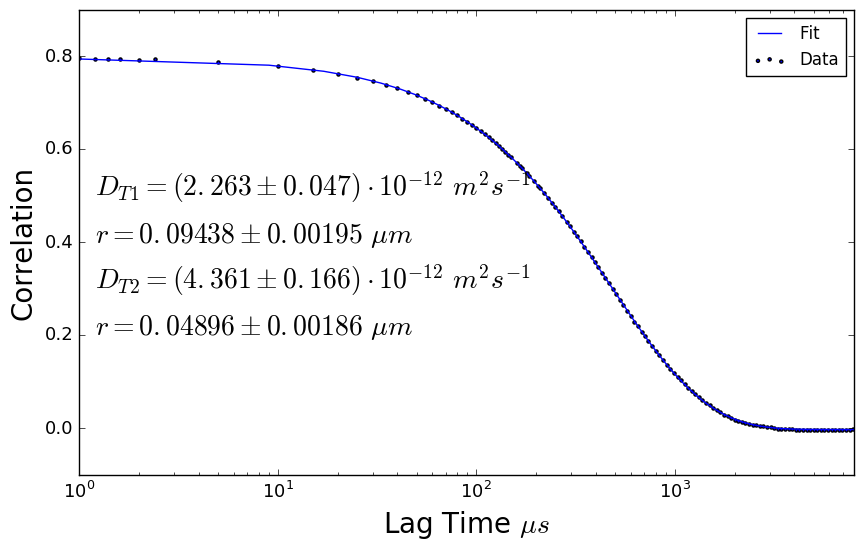

In [13]:
def myfun4(tau,beta,beta2,D4,D5,c):
    ans =  beta*np.exp(-2*D4*(K**2)*tau) + c + beta2*np.exp(-2*D5*(K**2)*tau)
    return ans

p04 = [0.5,0.5,1e-18,1e-18,0.5] #guess

xspace4 = np.linspace(1,8000,1000) 

plsq4, pcov4 = curve_fit(myfun4, DTime, DCorr, p04)  # curve fit returns p and covariance matrix
# these give the parameters and the uncertainties



D4 = plsq4[2]*1e6
eD4 = np.sqrt(pcov4[2,2])*1e6

D5 = plsq4[3]*1e6
eD5 = np.sqrt(pcov4[3,3])*1e6

yfit4 = myfun4(xspace4,plsq4[0],plsq4[1],plsq4[2],plsq4[3],plsq4[4])  # use fit results for a, b, c

plt.figure(figsize=(10,6));


plt.scatter(DTime,DCorr,marker='.',label='Data');
plt.plot(xspace4,yfit4,label='Fit');

plt.xlabel('Lag Time $\mu s$',fontsize=20);
plt.ylabel('Correlation',fontsize = 20);

plt.xticks(size = 13);
plt.yticks(size = 13);

plt.legend(loc='best');
plt.xscale('log');
plt.xlim(0,8000);


r4 = getradius(D4,eta)
er4 = getradiusuncertainty(D4,eta,eD4)
plt.text(1.2,0.4,'$r = %.5f \pm %.5f $ $\mu m$' % (r4*1e6, er4*1e6),size=20);

r5 = getradius(D5,eta)
er5 = getradiusuncertainty(D5,eta,eD5)
plt.text(1.2,0.2,'$r = %.5f \pm %.5f $ $\mu m$' % (r5*1e6, er5*1e6),size=20);


plt.text(1.2,0.5,'$D_{T1} = (%.3f \pm %.3f) \cdot  10^{-12}$ ${m^2}{s^{-1}}$' % (D4*1e12, eD4*1e12),size=20);
plt.text(1.2,0.3,'$D_{T2} = (%.3f \pm %.3f) \cdot  10^{-12}$ ${m^2}{s^{-1}}$' % (D5*1e12, eD5*1e12),size=20);



plt.savefig('DFit.png')